In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel, cmdstan_path
import pickle
import json
from sklearn.preprocessing import PowerTransformer, StandardScaler
import arviz as az
import pystan
from sklearn.metrics import mean_squared_error

In [2]:
y_data_raw = pd.read_csv("../data/y_count_original.csv")
y_data_raw.drop(columns=["age"], inplace=True)
y_data_raw

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,113.0,21.0,54.0,80.0,NaN,NaN,54.0,14.0,20.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,56.0,13.0,15.0,40.0,NaN,81.0,32.0,50.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,11.0,NaN,20.0,NaN,30.0,57.0,80.0,33.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,71.0,NaN,69.0,22.0,NaN,41.0,43.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,53.0,NaN,100.0,NaN,NaN,NaN,3.0,NaN,12.0
6,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,...,97.0,38.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,3.0,3.0,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
np.max(y_data_raw.values.flatten()[~np.isnan(y_data_raw.values.flatten())])

312.0

In [4]:
# DDH, FF + PCC, PKM, PKG, FFG
ship_column_index = [(1, 7), (8, 33), (34, 76), (77, 95), (96, 99)]
engine_types = {
    1 : "MTU 20V 956 TB92",
    2 : "GE LM2500",
    3 : "MTU 20V 538 TU90",
    4 : "MTU 16V 1163 TB93"
}
ship_full_displacement = [5520, 3100, 170, 570, 3300]
engine_count = [2,2,2,2,2]
ship_engine_type = [1, 2, 3, 4, 2]
ship_service_year = [2003, 1988, 1993, 2008, 2013]
propulsion_system = ["CODOG", "CODOG", "CODAD", "CODAG", "CODOG"]
complexity = {
    "CODOG" : 1.0,
    "CODAG" : 1.0,
    "CODAD" : 1.3,
}

In [5]:
relative_displacement = {}
engine_type = {}
ship_complexity_data = {}
ship_number = {}
ship_category = {}
for ship in y_data_raw.columns:
    shipnum = int(ship[1:])
    for i, (l, u) in enumerate(ship_column_index):
        if shipnum >= l and shipnum <= u:
            data_index = i
            break
    
    relative_displacement[f"s{shipnum}"] = np.round(ship_full_displacement[data_index] / np.min(ship_full_displacement), decimals=4)
    engine_type[f"s{shipnum}"] = ship_engine_type[data_index]
    ship_complexity_data[f"s{shipnum}"] = complexity[propulsion_system[data_index]]
    ship_number[f"s{shipnum}"] = shipnum
    ship_category[f"s{shipnum}"] = data_index + 1

In [6]:
relative_displacement_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in relative_displacement.items()})
engine_type_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in engine_type.items()})
ship_complexity_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in ship_complexity_data.items()})
ship_number_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in ship_number.items()})
ship_category_df = pd.DataFrame({key: np.tile(val, y_data_raw.shape[0]) for key, val in ship_category.items()})

In [7]:
y_data_raw = y_data_raw.loc[:, ((~y_data_raw.isnull()).sum(axis=0) >= 4)]

In [8]:
y_data_raw.columns

Index(['s1', 's2', 's3', 's5', 's8', 's9', 's11', 's12', 's13', 's15', 's17',
       's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27',
       's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37',
       's38', 's39', 's40', 's41', 's42', 's43', 's44', 's45', 's46', 's47',
       's48', 's49', 's50', 's51', 's52', 's53', 's54', 's55', 's56', 's57',
       's58', 's59', 's61', 's62', 's63', 's64', 's65', 's66', 's67', 's68',
       's69', 's70', 's71', 's72', 's77', 's78', 's79', 's80', 's81', 's82',
       's83', 's84', 's85', 's86', 's87', 's89', 's90', 's91', 's93', 's97',
       's99'],
      dtype='object')

In [9]:
relative_displacement_df = relative_displacement_df[y_data_raw.columns.tolist()]
engine_type_df = engine_type_df[y_data_raw.columns.tolist()]
ship_complexity_df = ship_complexity_df[y_data_raw.columns.tolist()]
ship_number_df = ship_number_df[y_data_raw.columns.tolist()]
ship_category_df = ship_category_df[y_data_raw.columns.tolist()]
age_df = pd.DataFrame(columns=y_data_raw.columns.tolist())
for x in range(31):
    age_df.loc[x] = np.tile((x)/30, age_df.shape[1])

In [10]:
engine_type_df.transpose().reset_index(drop=True).rename(columns={0: "engine_type"}).to_csv("engine_type.csv", columns=["engine_type"])

In [11]:
y_data = y_data_raw.values[~np.isnan(y_data_raw.values)].astype(np.int32)
ship_complexity_data = ship_complexity_df.values[~np.isnan(y_data_raw.values)]
ship_age_data = age_df.values[~np.isnan(y_data_raw.values)]
engine_data = engine_type_df.values[~np.isnan(y_data_raw.values)]
relative_displacement_data = relative_displacement_df.values[[~np.isnan(y_data_raw.values)]] + 1
engine_count_data = np.tile(2, y_data_raw.values[~np.isnan(y_data_raw.values)].shape[0])
ship_number_data = ship_number_df.values[~np.isnan(y_data_raw.values)]
ship_category_data = ship_category_df.values[~np.isnan(y_data_raw.values)]
y_data.shape, ship_complexity_data.shape, ship_age_data.shape, engine_data.shape, relative_displacement_data.shape, engine_count_data.shape, ship_number_data.shape, ship_category_data.shape


/home/dashadower/git_repos/aria/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """


((614,), (614,), (614,), (614,), (614,), (614,), (614,), (614,))

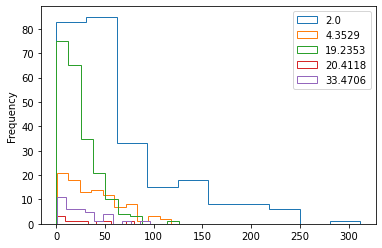

In [12]:
ax = plt.gca()
for disp in sorted(list(np.unique(relative_displacement_data))):
    pd.Series(y_data[relative_displacement_data == disp], name=disp).plot.hist(ax=ax, legend=True, histtype="step")

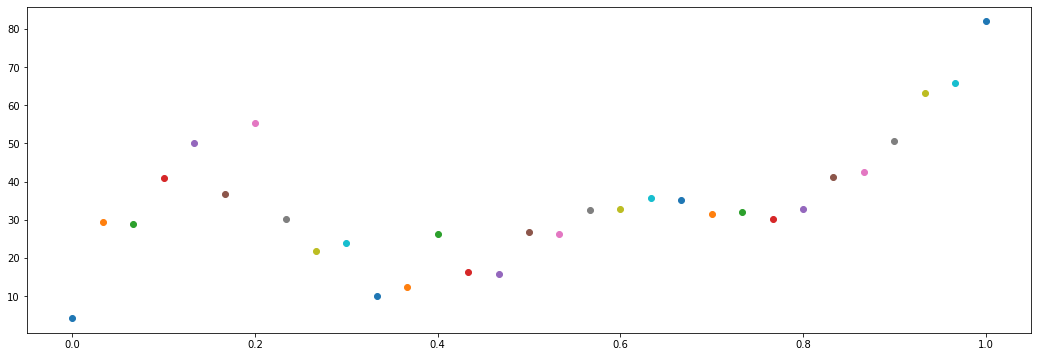

In [13]:
fig, ax = plt.subplots(figsize=(18,6))
yplot_val = ship_age_data
for disp in sorted(list(np.unique(yplot_val))):
    ax.scatter(disp, np.mean(y_data[yplot_val == disp]), label=disp)

#ax.legend()

/home/dashadower/git_repos/aria/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dashadower/git_repos/aria/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


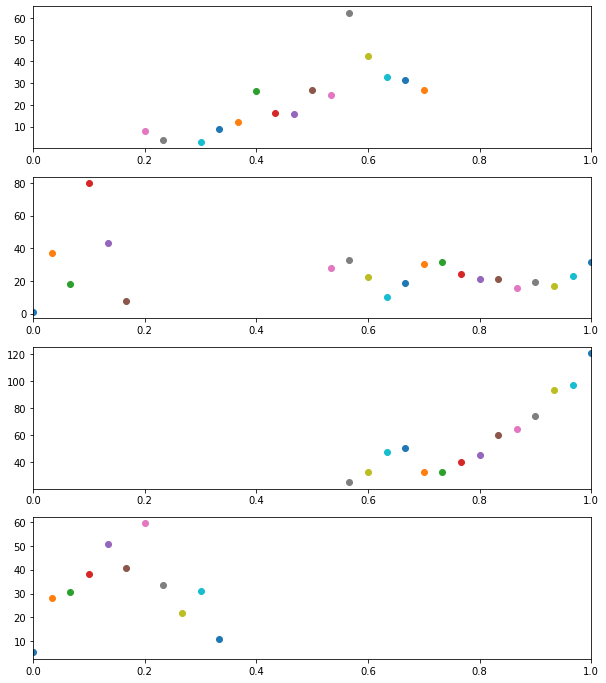

In [14]:
fig, ax = plt.subplots(4, figsize=(10,12))
yplot_val = ship_age_data
for engine in range(1, 5):
    ax[engine-1].set_xlim(0.0, 1.0)
    for disp in sorted(list(np.unique(yplot_val))):
        ax[engine-1].scatter(disp, np.mean(y_data[np.logical_and(yplot_val == disp, engine_data == engine)]), label=disp)

### 1. Conceptial Analysis

### Basic terms: 

MTTF(Mean Time To Failure): the average amount of time a non-repairable asset operates before it fails

MTTF = (total number of hours of operations) / (number of non-repairable components in system)

MTBF(Mean Time Between Failure): The average time(hours) between system breakdowns

MTBF = (number of operational hours) / (number of failures)

### Good references:

http://www.reliabilityanalytics.com/blog/2011/08/31/poisson-distribution/

http://reliawiki.org/index.php/The_Weibull_Distribution

https://www.weibull.com/hotwire/issue14/relbasics14.htm#:~:text=Weibull%20distributions%20with%20%CE%B2%20close,known%20as%20wear%2Dout%20failures.

"bathtub curve"

Poisson Regression: rate $\lambda$ = $(length\ of\ time) \times (failure\ rate)$

length of  time would be in years

failure rate = $\lambda$

$MTBF = \frac{1}{\lambda}$

## Example Features

1. ship relative displacement($\frac{shipsize_i}{\textrm{min}(shipsize)}$)
2. oldest ship age within class. per-ship age is not available
3. propulsion method(CODOG, CODAG, etc)
4. number of diesel engines
5. diesel engine horsepower
6. effective power/weight ratio ($\frac{combined\_diesel\_HP}{displacement}$)
7. relative complexity(CODAD: 1.3, CODOG: 1.0, CODAG: 1.0). Values set at my discretion. Should be viewed as strain
8. min-max scaled age $\frac{age - 1}{31 - 1}$, results in domain [0, 1]

### Assumptions

assumed failure count proportion based on propulsion system(my hypothesis):
~~CODAG > CODOG > CODAD~~ CODAD >>>> CODAG = CODOG

the older the ship, the more failure counts(may not be true. see bathtub curve)

~~engine size is proportional to ship size, hence larger engine means more complex system~~

propulsion system complexity - the more propulsion subsystems an engine has, the more prone it is to failures

### Example Model

$\lambda = earlyfailures + random failures + wearout$

early failures: related with engine type and complexity, exponentially decaying over age

random failures: unmeasurable, but believed to be proportional to complexity, deemed constant over age

wearout: ship age, operation uptime, complexity, exponentially increasing over age

## 2. Observational Space

For each ship $ship_i$ where $i = 1,2,3,...,99$, and $age = 1,2,3,...,31$ failure count $y_{i, age}$ is the failure count of $ship_i$ at its age since commision $age$

## 3. Construct Summary Statistic

skipping for now

# 4. Model Development

### input data:

age: min-max scaled age ($\frac{age - 1}{31 - 1}$, results in domain [0, 1])

ship: ship index(1~99)

relative_displacement: ($\frac{displacement_i}{\textrm{min}(displacement)}$)

complexity: relative complexity (1, 1.2, 1.5)

engine: integer engine index(1~4)

shiptype(ship_category): type of ship/category(1~5)


### model:
\begin{aligned}
y \sim \textrm{poisson}(\lambda_{ship,age})
\newline
\textrm{log} \ \lambda_{ship, age} = early_{ship} \times \textrm{failure_form}(\phi_{shiptype}, -age + 1) + wear_{ship, age} \times \textrm{failure_form}(\rho_{shiptype}, age) + \eta_{ship}
\newline
early_{ship, age} = complexity_{ship}  \times \alpha_{engine} + \beta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
wear_{ship, age} = complexity_{ship} \times engine\_count \times \gamma_{engine} + \delta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
\textrm{failure_form}(shape, age) = \frac{\textrm{exp}(shape)^{age} - 1}{\textrm{exp}(shape) - 1}
\newline
\phi \sim \textrm{normal}(5, 3), \, \phi \in [1, \infty)
\newline
\rho \sim \textrm{normal}(5, 3), \, \rho \in [1, \infty)
\newline
\alpha \sim \textrm{normal}(1.5, 1)
\newline
\beta \sim \textrm{normal}(0, 0.5)
\newline
\gamma \sim \textrm{normal}(0, 1)
\newline
\delta \sim \textrm{normal}(0, 0.5)
\newline
\eta \sim \textrm{normal}(0, 1)
\end{aligned}


## 5. Construct Summary Function

## 6. Simulate Bayesian Ensemble

The max observed failure count is 312. Therefore, $\lambda$ should be less than 6 ($\textrm{exp}(6) \approx 403$)

In [12]:
simu_ensemble_file = os.path.join("./models", "simu_bayesian_ensemble.stan")
simu_ensemble_model = pystan.StanModel(file=simu_ensemble_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5c5f91d4ffac723d024e28e0234d9921 NOW.


In [94]:
R = 1000
N = 1000
simu_age = 0.9
simu_relative_displacement = 2
simu_complexity = 1.3
simu_engine_count = 2
simu_data = {
    "N" : N,
    "age" : simu_age,
    "relative_displacement" : simu_relative_displacement,
    "complexity": simu_complexity,
    "engine_count" : simu_engine_count,
}
simu_ensemble_fit = simu_ensemble_model.sampling(iter=R, algorithm="Fixed_param", chains=1, data=simu_data)

In [95]:
simu_lambdas = simu_ensemble_fit.extract(pars=["lambda"])["lambda"]
simu_ys = simu_ensemble_fit.extract(pars=["y"])["y"]

In [96]:
np.mean(simu_lambdas[~np.isnan(simu_lambdas)])

0.056350859317772256

## 7. Prior Checks

In [97]:
np.sum(simu_lambdas[~np.isnan(simu_lambdas)] < 6)

879

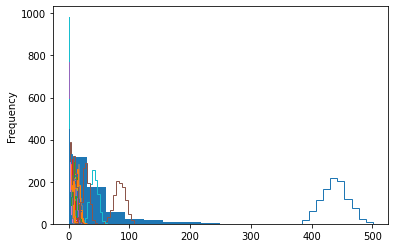

In [98]:
ax = plt.gca()
pd.Series(y_data).plot.hist(ax=ax)
pd.Series(y_data[np.logical_and(ship_age_data == simu_age, relative_displacement_data == simu_relative_displacement)]).plot.hist(ax=ax)
for x in range(100):
    pd.Series(simu_ys[x]).plot.hist(ax=ax, histtype="step")


## 8. Configure Algorithm

use default settings

## 9. Fit Simulated Ensemble

In [18]:
fit_model_file = os.path.join("./models", "fit_data.stan")
fit_model = pystan.StanModel(fit_model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a211305f0880372c96d270735e9d1640 NOW.


In [19]:
%%time
post_lambda_zscore = []
post_lambda_contraction = []
prior_lambda_std = np.std(simu_lambdas[~np.isnan(simu_lambdas)], ddof=1)
prior_lambda_mean = np.mean(simu_lambdas[~np.isnan(simu_lambdas)])
for x in range(50):
    if np.any(np.isnan(simu_ys[x])): 
        print("skip", x)
        continue
    fit_model_data = {
        "N" : N,
        "y" : simu_ys[x].astype(np.int32),
        "complexity" : simu_complexity,
        "age" : simu_age,
        "engine_count" : simu_engine_count,
        "relative_displacement" : simu_relative_displacement,
    }
    fit_model_fit = fit_model.sampling(data=fit_model_data, chains=2, iter=1000)
    fit_lambda_summary = fit_model_fit.summary(pars="lambda")["summary"][0]
    post_lambda_mean = fit_lambda_summary[0]
    post_lambda_std = fit_lambda_summary[2]
    post_lambda_zscore.append((post_lambda_mean - simu_lambdas[x]) / prior_lambda_mean)
    post_lambda_contraction.append(1 - (post_lambda_std / prior_lambda_std) ** 2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run a

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


skip 49
CPU times: user 1.3 s, sys: 3.25 s, total: 4.55 s
Wall time: 4min 11s


## 10. Algorithmic Calibration

skipping, since per-fit diagnostic information are seen in step 9's output.

about 1 divergence during step 9!

## 11. Inferential Calibration

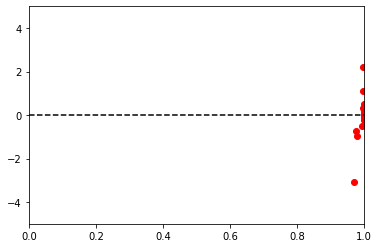

In [49]:
ax = plt.gca()
ax.set_xlim(0, 1)
ax.set_ylim(-5, 5)
ax.axhline(0, linestyle="--", c="black")
ax.scatter(post_lambda_contraction, post_lambda_zscore, c="r")

## 12. Fit Observed Data

In [21]:
post_pred_data = {
    "N" : y_data.shape[0],
    "engine_types" : np.max(ship_engine_type),
    "y" : y_data.astype(np.int32),
    "complexity" : ship_complexity_data,
    "age" : ship_age_data,
    "engine_type" : engine_data,
    "relative_displacement" : relative_displacement_data,
    "engine_count" : engine_count_data,
    "ship_number" : ship_number_data,
    "ship_number_max" : np.max(ship_number_data),
    "N_pred" : y_data.shape[0],
    "age_pred" : ship_age_data,
    "engine_type_pred" : engine_data,
    "complexity_pred" : ship_complexity_data,
    "relative_displacement_pred" : relative_displacement_data,
    "engine_count_pred" : engine_count_data,
    "ship_number_pred" : ship_number_data,
    
}

In [22]:
for key, val in post_pred_data.items():
    if isinstance(val, np.ndarray):
        print(key, val.shape)
    else:
        print(key, val)

N 614
engine_types 4
y (614,)
complexity (614,)
age (614,)
engine_type (614,)
relative_displacement (614,)
engine_count (614,)
ship_number (614,)
ship_number_max 99
N_pred 614
age_pred (614,)
engine_type_pred (614,)
complexity_pred (614,)
relative_displacement_pred (614,)
engine_count_pred (614,)
ship_number_pred (614,)


In [23]:
fit_data_model = pystan.StanModel(os.path.join("./models", "fit_data_post_pred.stan"))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_749c7b089968131a0a8771abd62f1af0 NOW.


In [24]:
%%time
fit_data_fit = fit_data_model.sampling(data=post_pred_data)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 271 ms, sys: 278 ms, total: 550 ms
Wall time: 1min 54s


In [25]:
np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0).shape

(614,)

In [26]:
y_pred = np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0)

In [27]:
transformer = PowerTransformer()
unscaled_data = pd.read_csv("../data/y_count_original.csv")
unscaled_data.drop(columns="age", inplace=True)
transformer.fit(unscaled_data.values[~np.isnan(unscaled_data)].reshape(-1, 1))

PowerTransformer()

In [28]:
mean_squared_error(transformer.transform(y_data.reshape(-1, 1)).flatten(), transformer.transform(y_pred.reshape(-1, 1)).flatten())

0.49796534419851296

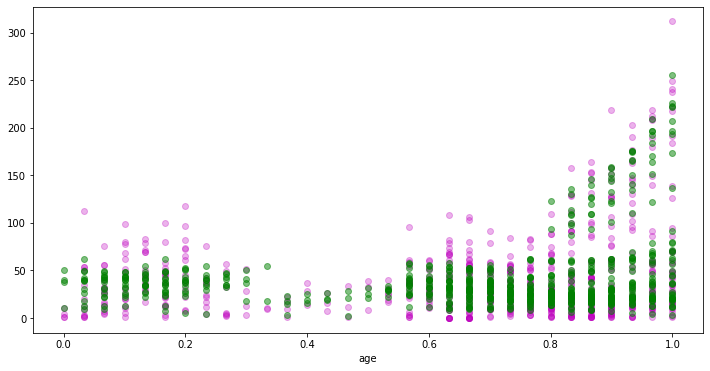

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('age')
ax.scatter(ship_age_data, y_data, color='m', alpha=0.3)
ax.scatter(ship_age_data, np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0), color="green", linewidth=1, alpha=0.5)

In [30]:
np.unique(ship_complexity_data)

array([1. , 1.3])

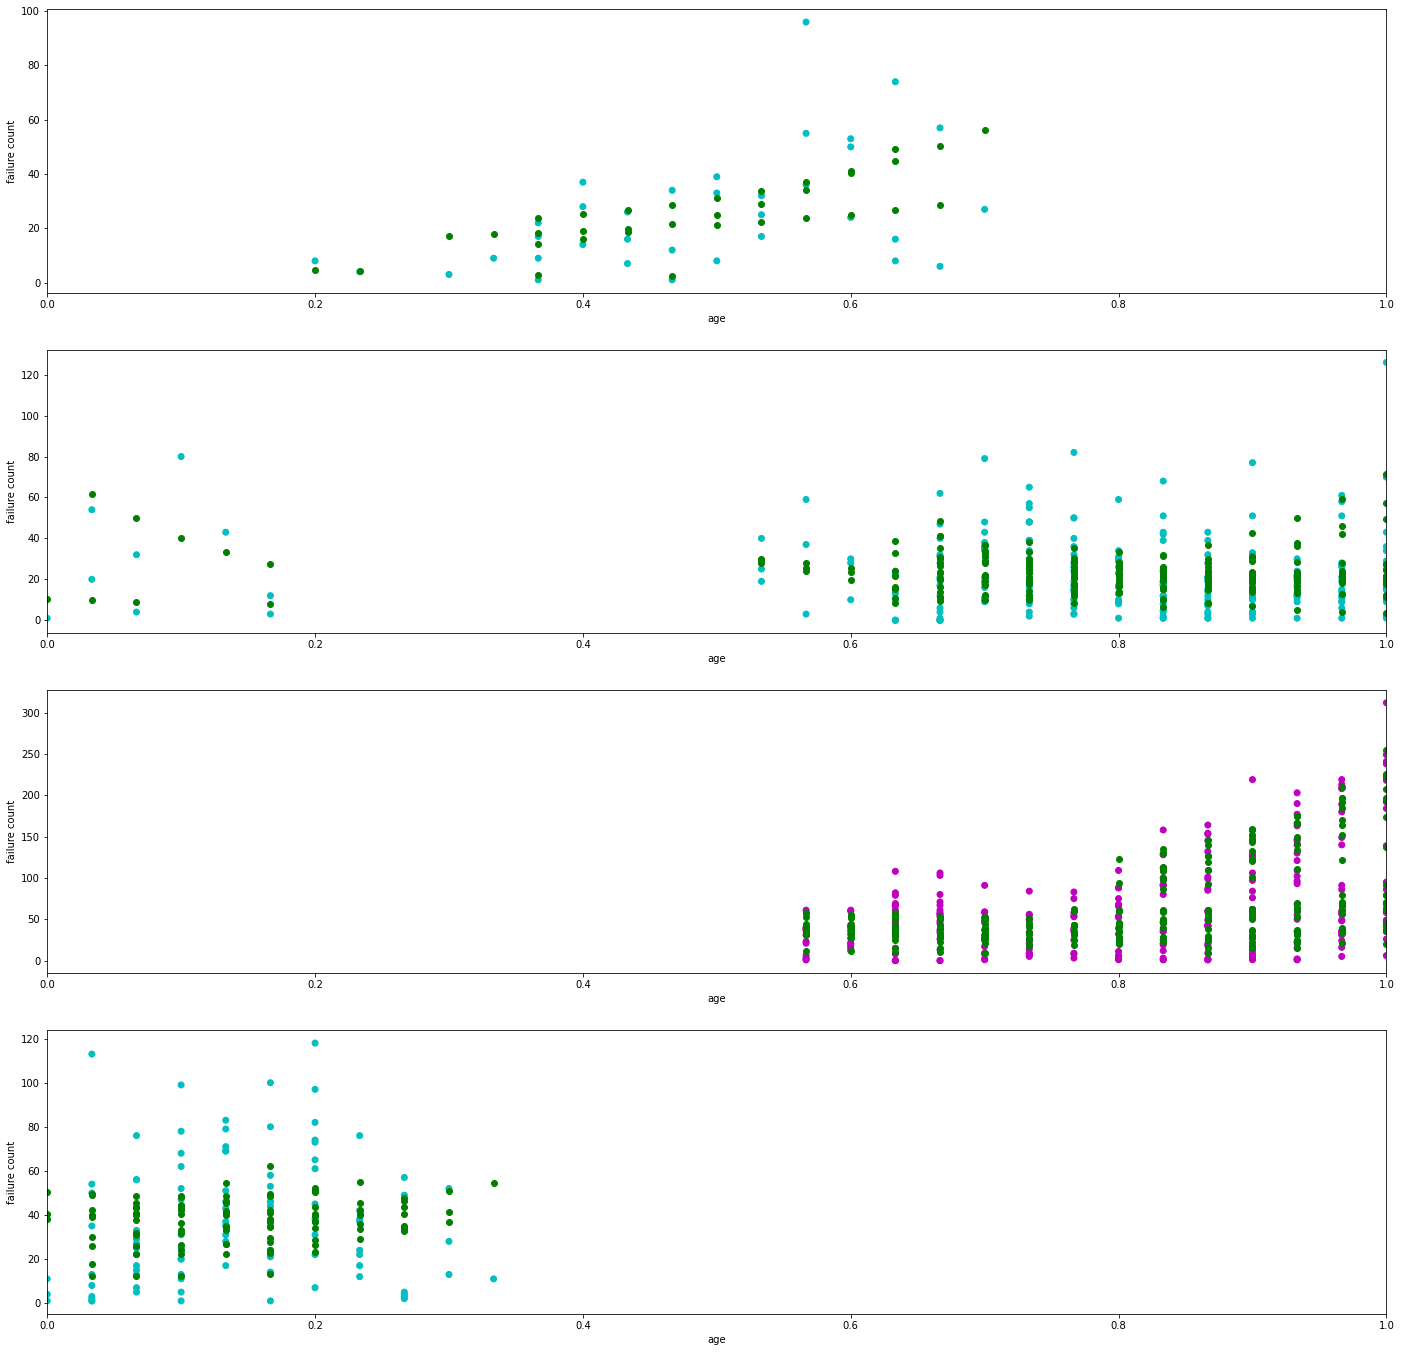

In [31]:
fig, ax = plt.subplots(4,1, figsize=(24, 24))
displacement_color = dict(zip(np.unique(relative_displacement_data), ("c", "m", "y", "b", "orange")))
complexity_color = dict(zip(np.unique(ship_complexity_data), ("c", "m", "b")))
#color = np.array([displacement_color[x] for x in relative_displacement_data])
color = np.array([complexity_color[x] for x in ship_complexity_data])
for x in range(1, 5):
    ax[x-1].set_xlabel('age')
    ax[x-1].set_ylabel('failure count')
    ax[x-1].set_xlim(0, 1)
    ax[x-1].scatter(ship_age_data[engine_data == x], y_data[engine_data == x], color=color[engine_data==x])
    ax[x-1].scatter(ship_age_data[engine_data == x], y_pred[engine_data == x], color="g")

# Second Iteration: Tweaking for better prediction accuracy

### Tweaking Model: Changing failure_form

The first model assumed that early failures and wearout shaped the same decay rate. However, due to its simple form and a single parameter, it's not possible to represent robust shapes. Therefore, the Weibull Distribution is used instead. The Weibull Distribution has the advantage of being able fo feasibly set priors due to its intuitive parameters.

Additionally, we attempt to remove random failures, since it's assumed that they are not common in mechanical systems.

Other prior are also set accordingly to scale

### model:
\begin{aligned}
y \sim \textrm{poisson}(\lambda_{ship,age})
\newline
\textrm{log} \ \lambda_{ship, age} = early_{ship} \times \textrm{failure_form}(\alpha_{engine}, \beta_{engine}, age) + wear_{ship, age} \times \textrm{failure_form}(\gamma_{engine}, \delta_{engine}, age)
\newline
early_{ship} = complexity_{ship}  \times \epsilon_{engine} + \zeta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
wear_{ship} = complexity_{ship} \times engine\_count \times \eta_{engine} + \theta_{ship} \ \textrm{ln} \ relative\_displacement
\newline
\textrm{failure_form}(shape, scale, age) = \frac{shape}{scale}(\frac{age}{scale})^{shape - 1} \textrm{exp}^{-(\frac{age}{scale})^{shape}}
\newline
\alpha \sim \textrm{log-normal}(0, 0.5), \, \alpha \in [0, \infty)
\newline
\beta \sim \textrm{normal}(1.5, 0.3), \, \beta \in [0, \infty)
\newline
\gamma \sim \textrm{normal}(4, 1.5), \, \gamma \in [0, \infty)
\newline
\delta \sim \textrm{normal}(1.3, 0.3), \, \delta \in [0, \infty)
\newline
\epsilon \sim \textrm{normal}(1.5, 1)
\newline
\zeta \sim \textrm{normal}(0.5, 0.5)
\newline
\eta \sim \textrm{normal}(1.5, 1)
\newline
\theta \sim \textrm{normal}(0.5, 0.5)
\end{aligned}

## 6. Simulate Bayesian Ensemble

In [22]:
simu_ensemble_file = os.path.join("./models", "simu_bayesian_ensemble-iter2.stan")
simu_ensemble_model = pystan.StanModel(file=simu_ensemble_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_12dc86dcf25181c33ecdac4b78ff4eb3 NOW.


In [23]:
R = 1000
N = 1000
simu_age = 0.8
simu_relative_displacement = 2
simu_complexity = 1.3
simu_engine_count = 2
simu_data = {
    "N" : N,
    "age" : simu_age,
    "relative_displacement" : simu_relative_displacement,
    "complexity": simu_complexity,
    "engine_count" : simu_engine_count,
}
simu_ensemble_fit = simu_ensemble_model.sampling(iter=R, algorithm="Fixed_param", chains=1, data=simu_data)

In [24]:
simu_lambdas = simu_ensemble_fit.extract(pars=["lambda"])["lambda"]
simu_ys = simu_ensemble_fit.extract(pars=["y"])["y"]

## 7. Prior Checks

In [25]:
simu_lambdas[~np.isnan(simu_lambdas)].shape

(1000,)

In [26]:
np.sum(simu_lambdas[~np.isnan(simu_lambdas)] < 6)

822

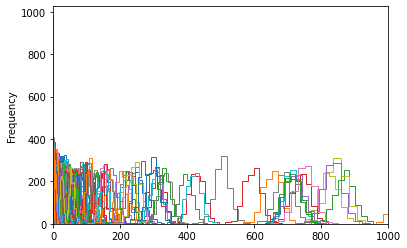

In [27]:
ax = plt.gca()
ax.set_xlim(0, 1000)
pd.Series(y_data).plot.hist(ax=ax)
pd.Series(y_data[np.logical_and(ship_age_data == simu_age, relative_displacement_data == simu_relative_displacement)]).plot.hist(ax=ax)
for x in range(400):
    pd.Series(simu_ys[x]).plot.hist(ax=ax, histtype="step")

## 8. Configure Algorithm

## 9. Fit Simulated Ensemble

In [28]:
fit_model_file = os.path.join("./models", "fit_data-iter2.stan")
fit_model = pystan.StanModel(fit_model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_838ed0a859c0543f1fb29804bb9d5ea7 NOW.


In [29]:
%%time
post_lambda_zscore = []
post_lambda_contraction = []
prior_lambda_std = np.std(simu_lambdas[~np.isnan(simu_lambdas)], ddof=1)
prior_lambda_mean = np.mean(simu_lambdas[~np.isnan(simu_lambdas)])
for x in range(50):
    if np.any(np.isnan(simu_ys[x])): 
        print("skip", x)
        continue
    print(x)
    fit_model_data = {
        "N" : N,
        "y" : simu_ys[x].astype(np.int32),
        "complexity" : simu_complexity,
        "age" : simu_age,
        "engine_count" : simu_engine_count,
        "relative_displacement" : simu_relative_displacement,
    }
    fit_model_fit = fit_model.sampling(data=fit_model_data, chains=2, iter=1000)
    fit_lambda_summary = fit_model_fit.summary(pars="lambda")["summary"][0]
    post_lambda_mean = fit_lambda_summary[0]
    post_lambda_std = fit_lambda_summary[2]
    post_lambda_zscore.append((post_lambda_mean - simu_lambdas[x]) / prior_lambda_mean)
    post_lambda_contraction.append(1 - (post_lambda_std / prior_lambda_std) ** 2)

0


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


1


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


2


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


3


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


4


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


5


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


6


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


7


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


8


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


9


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


10


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


11


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


12


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


13


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


14


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


15


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


16


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


17


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


18


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


19


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


20


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


21


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


22


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


23


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


24


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


25


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


26


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


27


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


28


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


29


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


30


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


31


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


32


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


33


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


34


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


35


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


36


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


37


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


38


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


39


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


40


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


41


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


42


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


43


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


44


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


45


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


46


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


47


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


48


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


49


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 1.85 s, sys: 5.08 s, total: 6.93 s
Wall time: 10min 14s


## 10. Algorithmic Calibration

## 11. Inferential Calibration

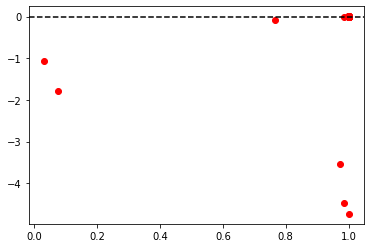

In [30]:
ax = plt.gca()
#ax.set_xlim(0, 1)
#ax.set_ylim(-5, 5)
ax.axhline(0, linestyle="--", c="black")
ax.scatter(post_lambda_contraction, post_lambda_zscore, c="r")

In [33]:
np.where(np.array(post_lambda_contraction) < 0.8)

(array([ 6, 34, 37]),)

In [34]:
np.where(np.array(post_lambda_zscore) <  -0.5)

(array([11, 23, 33, 34, 37]),)

## 12. Fit Observed Data

In [35]:
post_pred_data = {
    "N" : y_data.shape[0],
    "engine_types" : np.max(ship_engine_type),
    "y" : y_data.astype(np.int32),
    "complexity" : ship_complexity_data,
    "age" : ship_age_data,
    "engine_type" : engine_data,
    "relative_displacement" : relative_displacement_data,
    "engine_count" : engine_count_data,
    "ship_number" : ship_number_data,
    "ship_number_max" : np.max(ship_number_data),
    "N_pred" : y_data.shape[0],
    "age_pred" : ship_age_data,
    "engine_type_pred" : engine_data,
    "complexity_pred" : ship_complexity_data,
    "relative_displacement_pred" : relative_displacement_data,
    "engine_count_pred" : engine_count_data,
    "ship_number_pred" : ship_number_data,
    
}

In [36]:
fit_data_model = pystan.StanModel(os.path.join("./models", "fit_data_post_pred-iter2.stan"))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4cef8af71b4828c970eab29dbc233e07 NOW.


In [37]:
%%time
fit_data_fit = fit_data_model.sampling(data=post_pred_data)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


CPU times: user 264 ms, sys: 346 ms, total: 610 ms
Wall time: 5min 31s


In [42]:
print(fit_data_fit.stansummary())

Inference for Stan model: anon_model_4cef8af71b4828c970eab29dbc233e07.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                   mean se_mean     sd    2.5%     25%    50%     75%  97.5%  n_eff   Rhat
alpha[1]           1.92    0.65   1.98    0.65    1.09    1.3    2.19   8.66      9   1.31
alpha[2]           8.81    3.11   4.45    1.15     4.7   11.0   11.68  12.78      2   7.14
alpha[3]           3.63    0.01   0.09    3.53    3.61   3.64    3.66   3.71     79   1.04
alpha[4]           1.41    0.22   0.32    1.14    1.18   1.21    1.72   2.11      2   3.27
beta[1]            1.11    0.04   0.34     0.4    0.92   1.13    1.31   1.76     91   1.03
beta[2]            1.22    0.07   0.12    1.14    1.15   1.16     1.2   1.55      3   1.95
beta[3]            0.64  1.4e-3 9.8e-3    0.62    0.63   0.64    0.64   0.65     48   1.07
beta[4]            0.62    0.25   0.38    0.13    0.26   0.55    0.92    1.3      2

In [38]:
y_pred = np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0)

In [39]:
transformer = PowerTransformer()
unscaled_data = pd.read_csv("../data/y_count_original.csv")
unscaled_data.drop(columns="age", inplace=True)
transformer.fit(unscaled_data.values[~np.isnan(unscaled_data)].reshape(-1, 1))
mean_squared_error(transformer.transform(y_data.reshape(-1, 1)).flatten(), transformer.transform(y_pred.reshape(-1, 1)).flatten())

0.3861127939749751

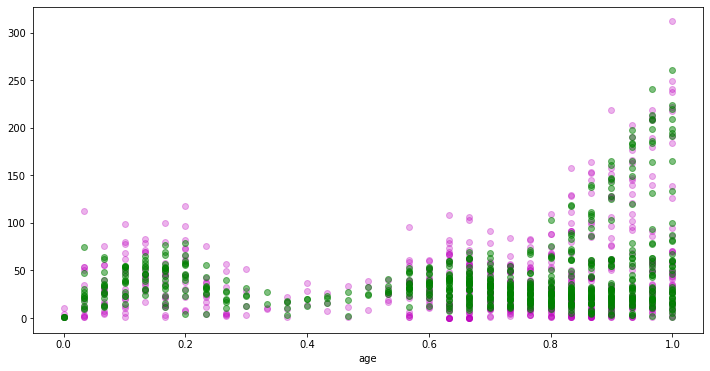

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('age')
ax.scatter(ship_age_data, y_data, color='m', alpha=0.3)
ax.scatter(ship_age_data, np.mean(fit_data_fit.extract(pars=["y_post_pred"])["y_post_pred"], axis=0), color="green", linewidth=1, alpha=0.5)

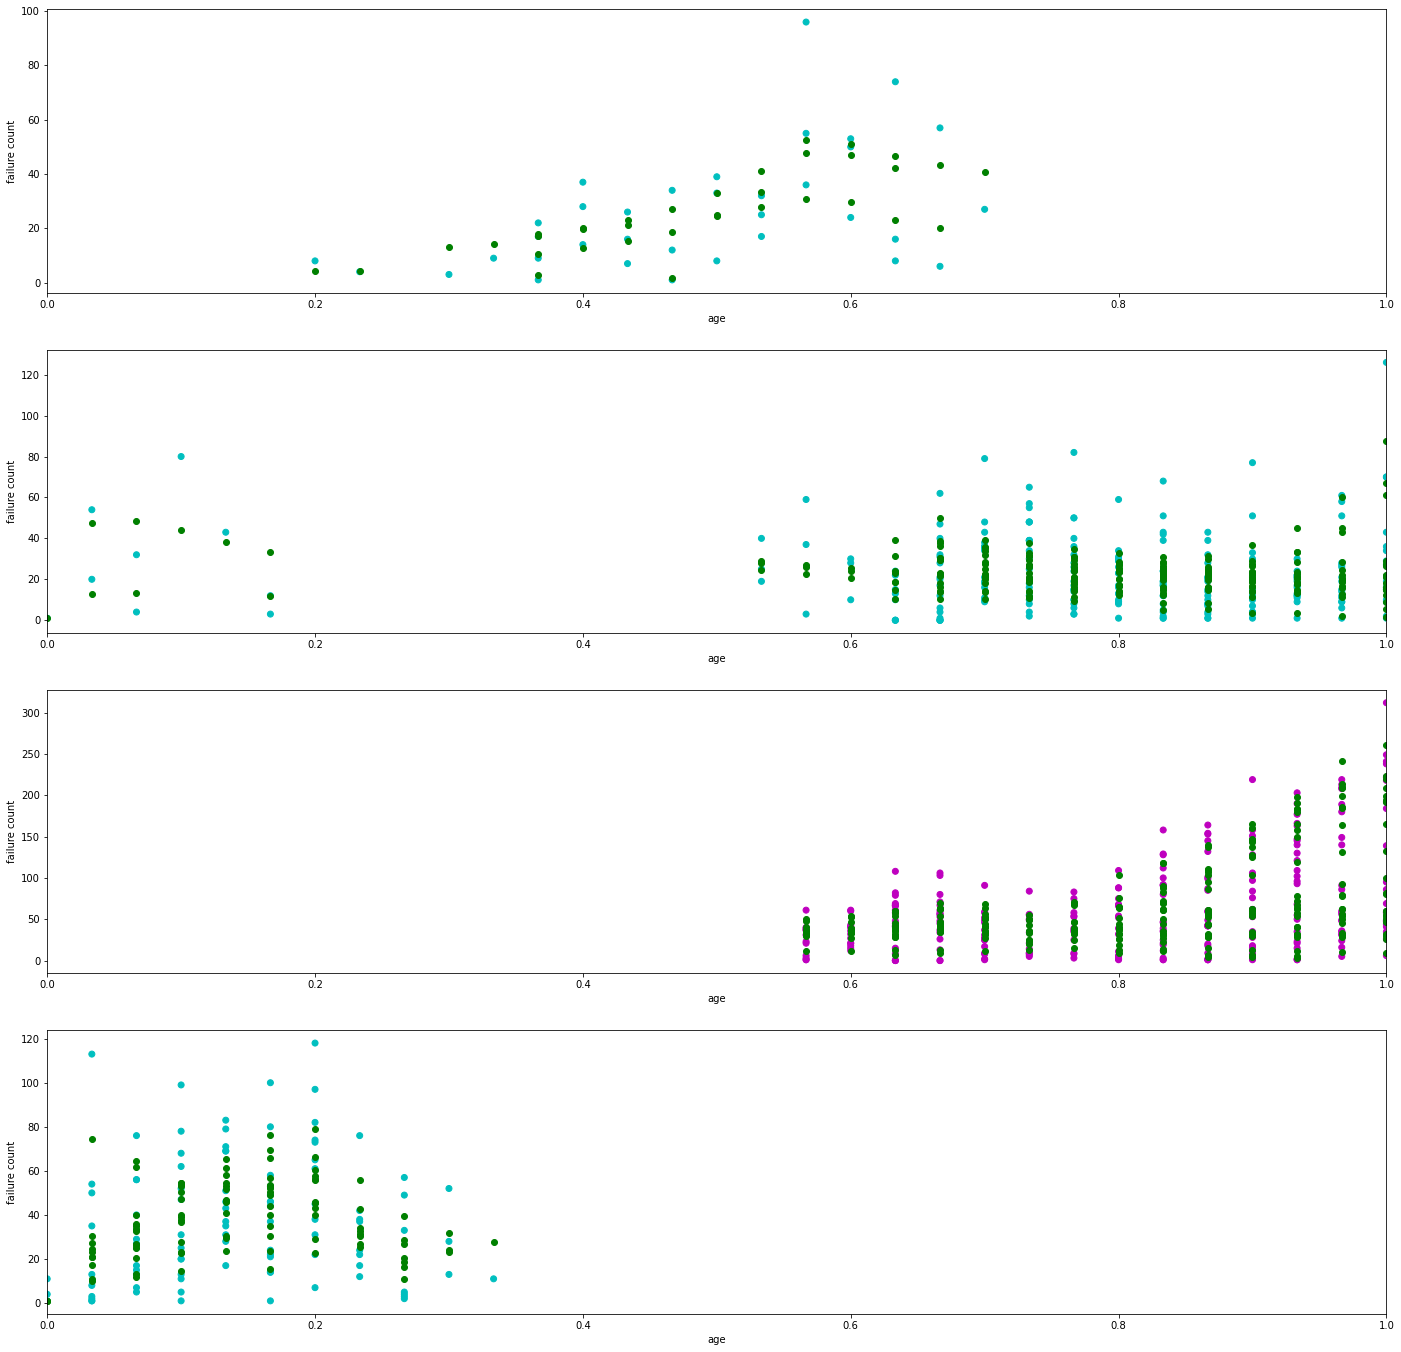

In [41]:
fig, ax = plt.subplots(4,1, figsize=(24, 24))
displacement_color = dict(zip(np.unique(relative_displacement_data), ("c", "m", "y", "b", "orange")))
complexity_color = dict(zip(np.unique(ship_complexity_data), ("c", "m", "b")))
#color = np.array([displacement_color[x] for x in relative_displacement_data])
color = np.array([complexity_color[x] for x in ship_complexity_data])
for x in range(1, 5):
    ax[x-1].set_xlabel('age')
    ax[x-1].set_ylabel('failure count')
    ax[x-1].set_xlim(0, 1)
    ax[x-1].scatter(ship_age_data[engine_data == x], y_data[engine_data == x], color=color[engine_data==x])
    ax[x-1].scatter(ship_age_data[engine_data == x], y_pred[engine_data == x], color="g")

In [43]:
az_inference = az.from_pystan(fit_data_fit)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4f897be80>,
      dtype=object)

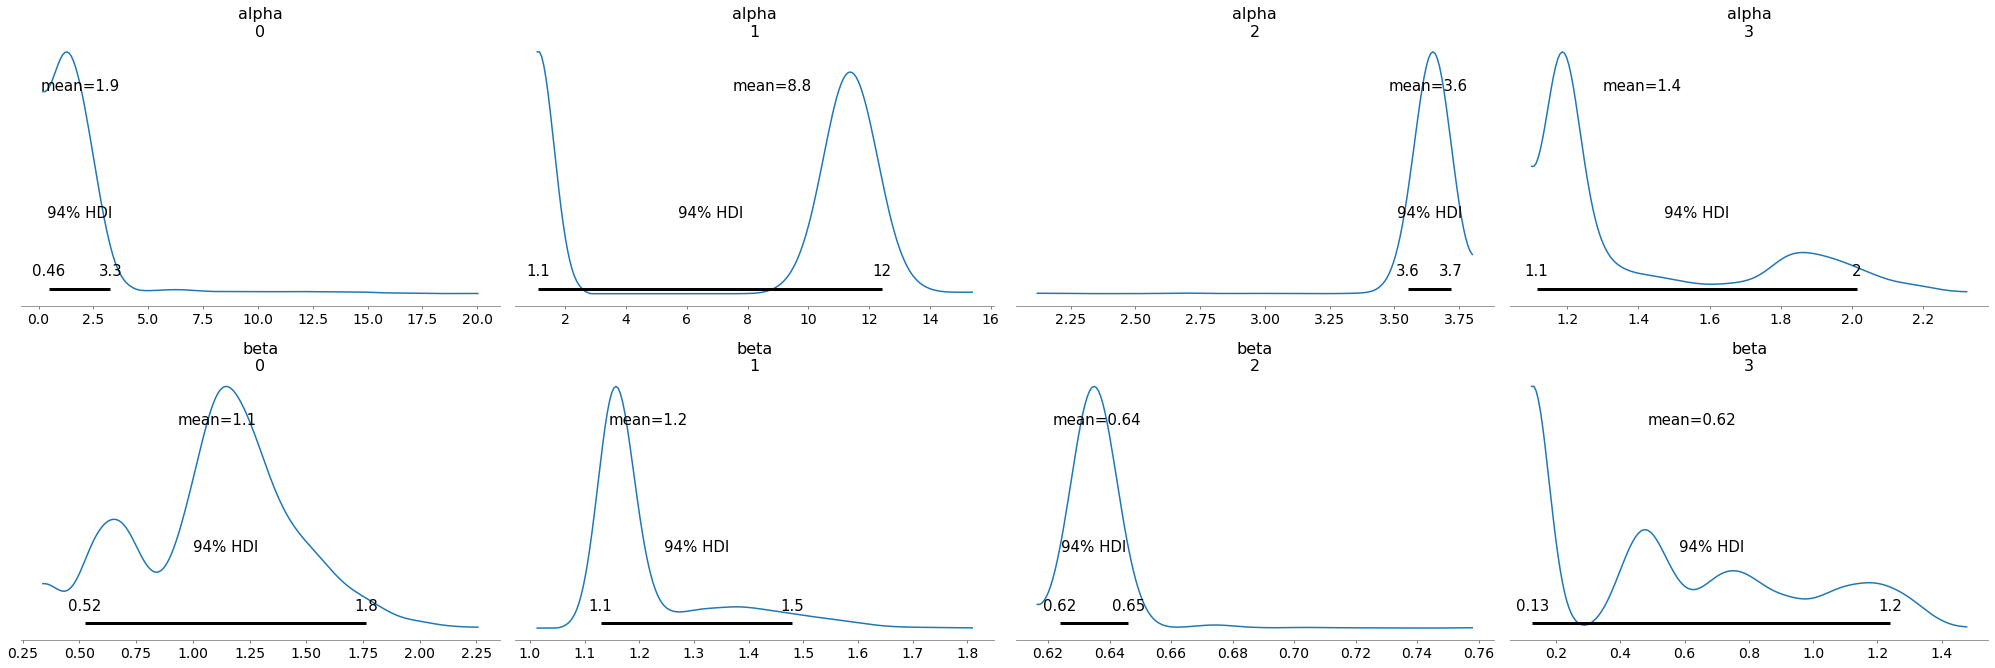

In [47]:
az.plot_posterior(az_inference, var_names=["alpha", "beta"])